## Data Update for 2024-05-13 export - Infilling one day

In [1]:
# Import
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import datetime, os
from cartopy import crs as ccrs
from cartopy import feature as cfeature
import seaborn as sns
from tabulate import tabulate
import sys
from matplotlib.colors import Normalize
from geopy.distance import geodesic
from scipy import stats

pd.options.display.max_columns = 50

print("Last updated on {}".format(datetime.datetime.now().ctime()))

Last updated on Wed May 15 14:34:51 2024


In [2]:
# Import Data
df = pd.read_pickle("Tier1_logentries-export-2024-05-13.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94864 entries, 0 to 96655
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DateTime                    94860 non-null  object        
 1   ID                          94861 non-null  float64       
 2   LogBook ID                  94861 non-null  object        
 3   Page                        58562 non-null  float64       
 4   Latitude                    71300 non-null  float64       
 5   Longitude                   61447 non-null  float64       
 6   Depth                       2075 non-null   float64       
 7   Depth Unit                  22455 non-null  object        
 8   Bottom                      63 non-null     object        
 9   Landmark                    14900 non-null  object        
 10  Ship Heading/Course         52176 non-null  object        
 11  Wind Direction              66278 non-null  object        


In [3]:
# Setting up a folder system
# Create folders called "Figures" and "Text/CSV Files" manually

# Get current directory
current_directory = os.getcwd()

# Specify the path to the folder
Figures = os.path.join(current_directory, "Figures")
Files = os.path.join(current_directory, "Text Files")
CSV = os.path.join(current_directory, "CSV Files")

In [4]:
# Sorting data
# Create a unique separator that does not appear in data
separator = "###"

# Replace consecutive spaces with the separator in the 'Landmark' column
df["Landmark"] = df["Landmark"].str.replace(r"\s+", separator, regex=True)

# Sort the DataFrame
df = df.sort_values(by=["LogBook ID", "DateTime", "Landmark"])

# Replace the separator with a single space
df["Landmark"] = df["Landmark"].str.replace(separator, " ")

In [5]:
# Creating a dataframe of usable data
df["usable"] = (
    df["Latitude"].notna() & df["Longitude"].notna() & df["Wind Force"].notna()
)
df_u = df[df["usable"] == True]
df_u

,DateTime,ID,LogBook ID,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Wind Force,Sea State,Cloud Cover,Weather,Ship Sightings,Miscellaneous Observations,wind force,Entry Date Time,Direction,Wind Direction Before,coord_diff,usable,usable_latlon,usable_lat
94878,1853-07-06 12:00:00,2442.0,A. Houghton (bark) 1853-1857,NaN,37.850000,-58.466667,NaN,NaN,NaN,NaN,SE,225.0,moderate gales,7.0,NaN,NaN,NaN,NaN,NaN,False,1853-07-06 12:00:00,nan,SW,False,True,True,True
94876,1853-07-07 12:00:00,2443.0,A. Houghton (bark) 1853-1857,NaN,37.250000,-55.066667,NaN,NaN,NaN,NaN,NaN,225.0,fresh breezes,5.0,NaN,NaN,NaN,NaN,NaN,False,1853-07-07 12:00:00,nan,SW,False,True,True,True
94874,1853-07-09 12:00:00,2446.0,A. Houghton (bark) 1853-1857,NaN,33.750000,-52.466667,NaN,NaN,NaN,NaN,SSE,225.0,light,2.0,NaN,NaN,fine,NaN,NaN,False,1853-07-09 12:00:00,nan,SW,False,True,True,True
94873,1853-07-10 12:00:00,2447.0,A. Houghton (bark) 1853-1857,NaN,33.333333,-53.716667,NaN,NaN,NaN,NaN,S,NaN,light airs,1.0,calms,NaN,NaN,NaN,NaN,False,1853-07-10 12:00:00,nan,NaN,False,True,True,True
94871,1853-07-12 12:00:00,2449.0,A. Houghton (bark) 1853-1857,NaN,33.816667,-53.066667,NaN,NaN,NaN,NaN,NaN,135.0,moderate winds,4.0,NaN,NaN,clear,NaN,NaN,False,1853-07-12 12:00:00,nan,SE,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32535,1846-08-29 12:00:00,66375.0,Yeoman (Bark) 1843-1848,NaN,35.350000,-45.166667,NaN,NaN,NaN,NaN,W by N,90.0,strong breezes,6.0,NaN,NaN,NaN,NaN,NaN,False,1846-08-29 12:00:00,nan,E,False,True,True,True
32533,1846-08-31 12:00:00,66377.0,Yeoman (Bark) 1843-1848,NaN,34.500000,-45.333333,NaN,NaN,NaN,NaN,SW,0.0,light winds,2.0,NaN,NaN,NaN,NaN,NaN,False,1846-08-31 12:00:00,nan,N,False,True,True,True
32532,1846-09-01 12:00:00,66378.0,Yeoman (Bark) 1843-1848,NaN,34.300000,-45.666667,NaN,NaN,NaN,NaN,WSW,315.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1846-09-01 12:00:00,nan,NW,False,True,True,True
32531,1846-09-02 12:00:00,66379.0,Yeoman (Bark) 1843-1848,NaN,34.450000,-46.150000,NaN,NaN,NaN,NaN,WNW,0.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1846-09-02 12:00:00,nan,N,False,True,True,True


# Taking the clean data and infilling where one day of data is missing

### Infilling missing latitude and longitude

In [6]:
# Finding distance traveled in instances of three consecutive days

# Sort the DataFrame by 'LogBook ID' and 'DateTime'
df_sorted = df.sort_values(by=["LogBook ID", "DateTime"])

# Initialize the new column
df_sorted["One Day Dist"] = np.nan


# Function to check if dates are consecutive
def are_consecutive_dates(date_above, date_selected, date_below):
    if all(pd.notna(date) for date in [date_above, date_selected, date_below]):
        # Check if dates are consecutive
        return (date_selected - date_above).days == 1 and (
            date_below - date_selected
        ).days == 1
    return False


# Iterate through the sorted DataFrame to check for the conditions
for i in range(
    1, len(df_sorted) - 1
):  # Start from the second row and end before the last row
    if np.isnan(df_sorted.iloc[i, df_sorted.columns.get_loc("Longitude")]) and np.isnan(
        df_sorted.iloc[i, df_sorted.columns.get_loc("Latitude")]
    ):
        # Check if both Longitude and Latitude are NaN in the current row
        if not (
            np.isnan(df_sorted.iloc[i - 1, df_sorted.columns.get_loc("Longitude")])
            or np.isnan(df_sorted.iloc[i + 1, df_sorted.columns.get_loc("Longitude")])
        ):
            # Check if Longitude in both previous and next rows are not NaN
            if not (
                np.isnan(df_sorted.iloc[i - 1, df_sorted.columns.get_loc("Latitude")])
                or np.isnan(
                    df_sorted.iloc[i + 1, df_sorted.columns.get_loc("Latitude")]
                )
            ):
                # Check if Latitude in both previous and next rows are not NaN
                date_above = pd.to_datetime(df_sorted.iloc[i - 1]["DateTime"]).date()
                date_selected = pd.to_datetime(df_sorted.iloc[i]["DateTime"]).date()
                date_below = pd.to_datetime(df_sorted.iloc[i + 1]["DateTime"]).date()

                if are_consecutive_dates(date_above, date_selected, date_below):
                    # Check if dates are consecutive
                    # Calculate distance for each consecutive pair of points
                    latitude1, longitude1 = (
                        df_sorted.iloc[i - 1, df_sorted.columns.get_loc("Latitude")],
                        df_sorted.iloc[i - 1, df_sorted.columns.get_loc("Longitude")],
                    )
                    latitude2, longitude2 = (
                        df_sorted.iloc[i + 1, df_sorted.columns.get_loc("Latitude")],
                        df_sorted.iloc[i + 1, df_sorted.columns.get_loc("Longitude")],
                    )
                    distance = geodesic(
                        (latitude1, longitude1), (latitude2, longitude2)
                    ).kilometers

                    # Update the 'One Day Dist' column
                    df_sorted.at[df_sorted.index[i], "One Day Dist"] = distance

# Print the DataFrame to verify the new column
print(df_sorted[["DateTime", "Latitude", "Longitude", "One Day Dist"]])

# Saving data to a CSV file
df["One Day Dist"] = df_sorted["One Day Dist"]
df.to_csv(os.path.join(CSV, "Tier2_logentries-export-2024-05-13.csv"), index=False)

                  DateTime  Latitude  Longitude  One Day Dist
10762                  4.5       NaN        NaN           NaN
10764                   10       NaN        NaN           NaN
94878  1853-07-06 12:00:00     37.85 -58.466667           NaN
94876  1853-07-07 12:00:00     37.25 -55.066667           NaN
94875  1853-07-08 12:00:00     35.00 -53.400000           NaN
...                    ...       ...        ...           ...
32526  1846-09-07 12:00:00       NaN        NaN           NaN
32525  1846-09-08 12:00:00       NaN        NaN           NaN
4315                   NaN       NaN        NaN           NaN
10768                  NaN       NaN        NaN           NaN
20332                  NaN       NaN        NaN           NaN

[94864 rows x 4 columns]


In [7]:
# Interpolate missing lat and lon for distances less than 350 km

# Add a new column to the dataframe to keep track of infilling
df["Infilled"] = False

# Iterate over the DataFrame index to find rows with 'One Day Dist' less than 350.00
for i in range(len(df_sorted)):
    if i == 0 or i == len(df_sorted) - 1:
        continue  # Skip first and last rows

    if df_sorted.at[df_sorted.index[i], "One Day Dist"] < 350.00:
        # Select rows between i-1 and i+2
        selected_rows = df_sorted.iloc[i - 1 : i + 2][["Latitude", "Longitude"]]

        # Interpolate between where the condition is met

        # Handle longitude wrap-around for interpolation
        # First value is negative (west) and last value is positive (east): ex. -179 to 179
        if (
            selected_rows.iloc[0]["Longitude"] < -170
            and selected_rows.iloc[-1]["Longitude"] > 170
        ):
            selected_rows["Longitude"] = selected_rows["Longitude"].apply(
                lambda x: x if x <= 0 else x - 360
            )
            interpolated_values = selected_rows.interpolate(method="linear")
            interpolated_values["Longitude"] = interpolated_values["Longitude"].apply(
                lambda x: x if x >= -180 else x + 360
            )
        # First value is positive (east) and second value is negative (west): ex. 179 to -179
        elif (
            selected_rows.iloc[0]["Longitude"] > 170
            and selected_rows.iloc[-1]["Longitude"] < -170
        ):
            selected_rows["Longitude"] = selected_rows["Longitude"].apply(
                lambda x: x if x >= 0 else x + 360
            )
            interpolated_values = selected_rows.interpolate(method="linear")
            interpolated_values["Longitude"] = interpolated_values["Longitude"].apply(
                lambda x: x if x <= -180 else x - 360
            )
        # Interpolate all other data gaps
        else:
            interpolated_values = selected_rows.interpolate(method="linear")

        # Assign interpolated values to Latitude and Longitude columns for i
        df.at[df_sorted.index[i], "Latitude"] = interpolated_values.iloc[1]["Latitude"]
        df.at[df_sorted.index[i], "Longitude"] = interpolated_values.iloc[1][
            "Longitude"
        ]

        # Mark the infilled column as true
        df.at[df_sorted.index[i], "Infilled"] = True

        # Mark the new infilled column as true
        df.at[df_sorted.index[i], "Day 1 Infilled"] = True

# Print the DataFrame to verify the new columns
print(df_sorted[["DateTime", "Latitude", "Longitude", "One Day Dist"]])

# Saving data to a CSV file
df.to_csv(os.path.join(CSV, "Tier2_logentries-export-2024-05-13.csv"), index=False)

/tmp/ipykernel_18408/2412016793.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[df_sorted.index[i], 'Day 1 Infilled'] = True


                  DateTime  Latitude  Longitude  One Day Dist
10762                  4.5       NaN        NaN           NaN
10764                   10       NaN        NaN           NaN
94878  1853-07-06 12:00:00     37.85 -58.466667           NaN
94876  1853-07-07 12:00:00     37.25 -55.066667           NaN
94875  1853-07-08 12:00:00     35.00 -53.400000           NaN
...                    ...       ...        ...           ...
32526  1846-09-07 12:00:00       NaN        NaN           NaN
32525  1846-09-08 12:00:00       NaN        NaN           NaN
4315                   NaN       NaN        NaN           NaN
10768                  NaN       NaN        NaN           NaN
20332                  NaN       NaN        NaN           NaN

[94864 rows x 4 columns]


In [8]:
# Count the number of values infilled so far
num_infilled = df["Infilled"].sum()

print(
    "Total number of new values added to the latitude and longitude columns:",
    num_infilled,
)

Total number of new values added to the latitude and longitude columns: 1741


### Just Latitude

In [9]:
# Finding one day of latitude missing in instances of three consecutive days
# and taking the change in latitude to see travel distance

# Initialize the new column
df_sorted["One Day Lat"] = np.nan


# Function to check if dates are consecutive
def are_consecutive_dates(date_above, date_selected, date_below):
    if all(pd.notna(date) for date in [date_above, date_selected, date_below]):
        # Check if dates are consecutive
        return (date_selected - date_above).days == 1 and (
            date_below - date_selected
        ).days == 1
    return False


# Iterate through the sorted DataFrame to check for the conditions
for i in range(
    1, len(df_sorted) - 1
):  # Start from the second row and end before the last row
    if np.isnan(df_sorted.iloc[i, df_sorted.columns.get_loc("Latitude")]):
        # Check if both Longitude and Latitude are NaN in the current row
        if not (
            np.isnan(df_sorted.iloc[i - 1, df_sorted.columns.get_loc("Latitude")])
            or np.isnan(df_sorted.iloc[i + 1, df_sorted.columns.get_loc("Latitude")])
        ):
            # Check if Longitude in both previous and next rows are not NaN
            date_above = pd.to_datetime(df_sorted.iloc[i - 1]["DateTime"]).date()
            date_selected = pd.to_datetime(df_sorted.iloc[i]["DateTime"]).date()
            date_below = pd.to_datetime(df_sorted.iloc[i + 1]["DateTime"]).date()

            if are_consecutive_dates(date_above, date_selected, date_below):
                # Check if dates are consecutive

                # Calculate change in lat for each consecutive pair of points
                latitude1 = df_sorted.iloc[i - 1, df_sorted.columns.get_loc("Latitude")]
                latitude2 = df_sorted.iloc[i + 1, df_sorted.columns.get_loc("Latitude")]
                distance = latitude1 - latitude2

                # Update the 'One Day Dist' column
                df_sorted.at[df_sorted.index[i], "One Day Lat"] = distance

# Print the DataFrame to verify the new column
print(df_sorted[["DateTime", "Latitude", "Longitude", "One Day Lat"]])
df["One Day Lat"] = df_sorted["One Day Lat"]

# Saving data to a CSV file
df.to_csv(os.path.join(CSV, "Tier2_logentries-export-2024-05-13.csv"), index=False)

                  DateTime  Latitude  Longitude  One Day Lat
10762                  4.5       NaN        NaN          NaN
10764                   10       NaN        NaN          NaN
94878  1853-07-06 12:00:00     37.85 -58.466667          NaN
94876  1853-07-07 12:00:00     37.25 -55.066667          NaN
94875  1853-07-08 12:00:00     35.00 -53.400000          NaN
...                    ...       ...        ...          ...
32526  1846-09-07 12:00:00       NaN        NaN          NaN
32525  1846-09-08 12:00:00       NaN        NaN          NaN
4315                   NaN       NaN        NaN          NaN
10768                  NaN       NaN        NaN          NaN
20332                  NaN       NaN        NaN          NaN

[94864 rows x 4 columns]


In [10]:
# Filling in days where latitude difference is less than 2 degrees

# Iterate over the DataFrame index to find rows with 'One Day Lat' less than 2
for i in range(len(df_sorted)):
    if i == 0 or i == len(df_sorted) - 1:
        continue  # Skip first and last rows

    if -2.01 < df_sorted.at[df_sorted.index[i], "One Day Lat"] < 2.01:
        # Check if New Longitude is already filled
        if pd.notna(df_sorted.at[df_sorted.index[i], "Latitude"]):
            continue
        else:
            # Select rows between i-1 and i+1
            selected_rows = df_sorted.iloc[i - 1 : i + 2][["Latitude", "Longitude"]]

            # Interpolate between where the condition is met
            interpolated_values = selected_rows.interpolate(method="linear")

            # Assign interpolated values to Latitude column for i
            df.at[df_sorted.index[i], "Latitude"] = interpolated_values.iloc[1][
                "Latitude"
            ]

            # Mark the infilled column as true
            df.at[df_sorted.index[i], "Infilled"] = True

            # Mark the new infilled column as true
            df.at[df_sorted.index[i], "Day 1 Infilled"] = True

# Print the DataFrame to verify the new column
print(df_sorted[["DateTime", "Latitude", "Longitude", "One Day Lat"]])

# Saving data to a CSV file
df.to_csv(os.path.join(CSV, "Tier2_logentries-export-2024-05-13.csv"), index=False)

                  DateTime  Latitude  Longitude  One Day Lat
10762                  4.5       NaN        NaN          NaN
10764                   10       NaN        NaN          NaN
94878  1853-07-06 12:00:00     37.85 -58.466667          NaN
94876  1853-07-07 12:00:00     37.25 -55.066667          NaN
94875  1853-07-08 12:00:00     35.00 -53.400000          NaN
...                    ...       ...        ...          ...
32526  1846-09-07 12:00:00       NaN        NaN          NaN
32525  1846-09-08 12:00:00       NaN        NaN          NaN
4315                   NaN       NaN        NaN          NaN
10768                  NaN       NaN        NaN          NaN
20332                  NaN       NaN        NaN          NaN

[94864 rows x 4 columns]


In [11]:
# Count the number of values infilled so far
num_infilled = df["Infilled"].sum()

print(
    "Total number of new values added to the latitude and longitude columns:",
    num_infilled,
)

Total number of new values added to the latitude and longitude columns: 3334


### Just Longitude

In [12]:
# Finding one day of longitude missing in instances of three consecutive days
# and taking the change in latitude to see travel distance

# Initialize the new column
df_sorted["One Day Lon"] = np.nan


# Function to check if dates are consecutive
def are_consecutive_dates(date_above, date_selected, date_below):
    if all(pd.notna(date) for date in [date_above, date_selected, date_below]):
        # Check if dates are consecutive
        return (date_selected - date_above).days == 1 and (
            date_below - date_selected
        ).days == 1
    return False


# Iterate through the sorted DataFrame to check for the conditions
for i in range(
    1, len(df_sorted) - 1
):  # Start from the second row and end before the last row
    if np.isnan(df_sorted.iloc[i, df_sorted.columns.get_loc("Longitude")]):
        # Check if both Longitude and Latitude are NaN in the current row
        if not (
            np.isnan(df_sorted.iloc[i - 1, df_sorted.columns.get_loc("Longitude")])
            or np.isnan(df_sorted.iloc[i + 1, df_sorted.columns.get_loc("Longitude")])
        ):
            # Check if Longitude in both previous and next rows are not NaN
            date_above = pd.to_datetime(df_sorted.iloc[i - 1]["DateTime"]).date()
            date_selected = pd.to_datetime(df_sorted.iloc[i]["DateTime"]).date()
            date_below = pd.to_datetime(df_sorted.iloc[i + 1]["DateTime"]).date()

            if are_consecutive_dates(date_above, date_selected, date_below):
                # Check if dates are consecutive
                # Calculate change in lon for each consecutive pair of points
                longitude1 = df_sorted.iloc[
                    i - 1, df_sorted.columns.get_loc("Longitude")
                ]
                longitude2 = df_sorted.iloc[
                    i + 1, df_sorted.columns.get_loc("Longitude")
                ]

                # Calculate the raw difference
                raw_difference = longitude1 - longitude2

                # Define the threshold for crossing over 175°E or -175°
                threshold = 175

                # Adjust the raw difference if it crosses over the threshold
                if (longitude1 > threshold and longitude2 < -threshold) or (
                    longitude1 < -threshold and longitude2 > threshold
                ):
                    if raw_difference > 0:
                        distance = raw_difference - 360
                    else:
                        distance = raw_difference + 360
                else:
                    distance = raw_difference

                # Update the 'One Day Lon' column
                df_sorted.at[df_sorted.index[i], "One Day Lon"] = distance

# Print the DataFrame to verify the new column
print(df_sorted[["DateTime", "Latitude", "Longitude", "One Day Lon"]])
df["One Day Lon"] = df_sorted["One Day Lon"]

# Saving data to a CSV file
df.to_csv(os.path.join(CSV, "Tier2_logentries-export-2024-05-13.csv"), index=False)

                  DateTime  Latitude  Longitude  One Day Lon
10762                  4.5       NaN        NaN          NaN
10764                   10       NaN        NaN          NaN
94878  1853-07-06 12:00:00     37.85 -58.466667          NaN
94876  1853-07-07 12:00:00     37.25 -55.066667          NaN
94875  1853-07-08 12:00:00     35.00 -53.400000          NaN
...                    ...       ...        ...          ...
32526  1846-09-07 12:00:00       NaN        NaN          NaN
32525  1846-09-08 12:00:00       NaN        NaN          NaN
4315                   NaN       NaN        NaN          NaN
10768                  NaN       NaN        NaN          NaN
20332                  NaN       NaN        NaN          NaN

[94864 rows x 4 columns]


In [13]:
# Filling in days where longitude difference is less than 2 degrees

# Iterate over the DataFrame index to find rows with 'One Day Lon' less than 2
for i in range(len(df_sorted)):
    if i == 0 or i == len(df_sorted) - 1:
        continue  # Skip first and last rows

    if -2.01 < df_sorted.at[df_sorted.index[i], "One Day Lon"] < 2.01:
        # Check if New Longitude is already filled
        if pd.notna(df_sorted.at[df_sorted.index[i], "Longitude"]):
            continue
        else:
            # Select rows between i-1 and i+1
            selected_rows = df_sorted.iloc[i - 1 : i + 2][["Latitude", "Longitude"]]

            # Interpolate between where the condition is met

            # Handle longitude wrap-around for interpolation
            # First value is negative (west) and last value is positive (east): ex. -179 to 179
            if (
                selected_rows.iloc[0]["Longitude"] < -170
                and selected_rows.iloc[-1]["Longitude"] > 170
            ):
                selected_rows["Longitude"] = selected_rows["Longitude"].apply(
                    lambda x: x if x <= 0 else x - 360
                )
                interpolated_values = selected_rows.interpolate(method="linear")
                interpolated_values["Longitude"] = interpolated_values[
                    "Longitude"
                ].apply(lambda x: x if x >= -180 else x + 360)
            # First value is positive (east) and second value is negative (west): ex. 179 to -179
            elif (
                selected_rows.iloc[0]["Longitude"] > 170
                and selected_rows.iloc[-1]["Longitude"] < -170
            ):
                selected_rows["Longitude"] = selected_rows["Longitude"].apply(
                    lambda x: x if x >= 0 else x + 360
                )
                interpolated_values = selected_rows.interpolate(method="linear")
                interpolated_values["Longitude"] = interpolated_values[
                    "Longitude"
                ].apply(lambda x: x if x <= -180 else x - 360)
            # Interpolate all other data gaps
            else:
                interpolated_values = selected_rows.interpolate(method="linear")

            # Store the interpolated longitude values in the new column
            df.at[df_sorted.index[i], "Longitude"] = interpolated_values.iloc[1][
                "Longitude"
            ]

            # Mark the 'Infilled' column as true
            df.at[df_sorted.index[i], "Infilled"] = True

            # Mark the new infilled column as true
            df.at[df_sorted.index[i], "Day 1 Infilled"] = True

# Print the DataFrame to verify the changes
print(df_sorted[["DateTime", "Latitude", "Longitude"]])

# Saving data to a CSV file
df.to_csv(os.path.join(CSV, "Tier2_logentries-export-2024-05-13.csv"), index=False)

                  DateTime  Latitude  Longitude
10762                  4.5       NaN        NaN
10764                   10       NaN        NaN
94878  1853-07-06 12:00:00     37.85 -58.466667
94876  1853-07-07 12:00:00     37.25 -55.066667
94875  1853-07-08 12:00:00     35.00 -53.400000
...                    ...       ...        ...
32526  1846-09-07 12:00:00       NaN        NaN
32525  1846-09-08 12:00:00       NaN        NaN
4315                   NaN       NaN        NaN
10768                  NaN       NaN        NaN
20332                  NaN       NaN        NaN

[94864 rows x 3 columns]


In [14]:
# Count the number of values infilled so far
num_infilled = df["Infilled"].sum()

print(
    "Total number of new values added to the latitude and longitude columns:",
    num_infilled,
)

Total number of new values added to the latitude and longitude columns: 5059


In [15]:
# Moving the infilled column to be next to the longitude column
# Extract the 'Infilled' column
infilled_column = df["Infilled"]

# Drop the 'Infilled' column from its current position
df.drop(columns=["Infilled"], inplace=True)

# Find the index of the 'Longitude' column
longitude_index = df.columns.get_loc("Longitude")

# Insert the 'Infilled' column next to the 'Longitude' column
df.insert(longitude_index + 1, "Infilled", infilled_column)

# Print the DataFrame to verify the column positions
# print(df.head())

In [16]:
# Creating a dataframe of usable data
df["Tier2_usable"] = (
    df["Latitude"].notna() & df["Longitude"].notna() & df["Wind Force"].notna()
)
df_u2 = df[df["Tier2_usable"] == True]
df_u2

,DateTime,ID,LogBook ID,Page,Latitude,Longitude,Infilled,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Wind Force,Sea State,Cloud Cover,Weather,Ship Sightings,Miscellaneous Observations,wind force,Entry Date Time,Direction,Wind Direction Before,coord_diff,usable,usable_latlon,usable_lat,One Day Dist,Day 1 Infilled,One Day Lat,One Day Lon,Tier2_usable
94878,1853-07-06 12:00:00,2442.0,A. Houghton (bark) 1853-1857,NaN,37.850000,-58.466667,False,NaN,NaN,NaN,NaN,SE,225.0,moderate gales,7.0,NaN,NaN,NaN,NaN,NaN,False,1853-07-06 12:00:00,nan,SW,False,True,True,True,NaN,NaN,NaN,NaN,True
94876,1853-07-07 12:00:00,2443.0,A. Houghton (bark) 1853-1857,NaN,37.250000,-55.066667,False,NaN,NaN,NaN,NaN,NaN,225.0,fresh breezes,5.0,NaN,NaN,NaN,NaN,NaN,False,1853-07-07 12:00:00,nan,SW,False,True,True,True,NaN,NaN,NaN,NaN,True
94874,1853-07-09 12:00:00,2446.0,A. Houghton (bark) 1853-1857,NaN,33.750000,-52.466667,False,NaN,NaN,NaN,NaN,SSE,225.0,light,2.0,NaN,NaN,fine,NaN,NaN,False,1853-07-09 12:00:00,nan,SW,False,True,True,True,NaN,NaN,NaN,NaN,True
94873,1853-07-10 12:00:00,2447.0,A. Houghton (bark) 1853-1857,NaN,33.333333,-53.716667,False,NaN,NaN,NaN,NaN,S,NaN,light airs,1.0,calms,NaN,NaN,NaN,NaN,False,1853-07-10 12:00:00,nan,NaN,False,True,True,True,NaN,NaN,NaN,NaN,True
94871,1853-07-12 12:00:00,2449.0,A. Houghton (bark) 1853-1857,NaN,33.816667,-53.066667,False,NaN,NaN,NaN,NaN,NaN,135.0,moderate winds,4.0,NaN,NaN,clear,NaN,NaN,False,1853-07-12 12:00:00,nan,SE,False,True,True,True,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32534,1846-08-30 12:00:00,66376.0,Yeoman (Bark) 1843-1848,NaN,34.925000,-45.250000,True,NaN,NaN,NaN,NaN,W,90.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1846-08-30 12:00:00,nan,E,False,False,False,False,95.520015,True,0.85,0.166667,True
32533,1846-08-31 12:00:00,66377.0,Yeoman (Bark) 1843-1848,NaN,34.500000,-45.333333,False,NaN,NaN,NaN,NaN,SW,0.0,light winds,2.0,NaN,NaN,NaN,NaN,NaN,False,1846-08-31 12:00:00,nan,N,False,True,True,True,NaN,NaN,NaN,NaN,True
32532,1846-09-01 12:00:00,66378.0,Yeoman (Bark) 1843-1848,NaN,34.300000,-45.666667,False,NaN,NaN,NaN,NaN,WSW,315.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1846-09-01 12:00:00,nan,NW,False,True,True,True,NaN,NaN,NaN,NaN,True
32531,1846-09-02 12:00:00,66379.0,Yeoman (Bark) 1843-1848,NaN,34.450000,-46.150000,False,NaN,NaN,NaN,NaN,WNW,0.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1846-09-02 12:00:00,nan,N,False,True,True,True,NaN,NaN,NaN,NaN,True


# Creating Figures

Number of entries covered by the mapping so far:  54420


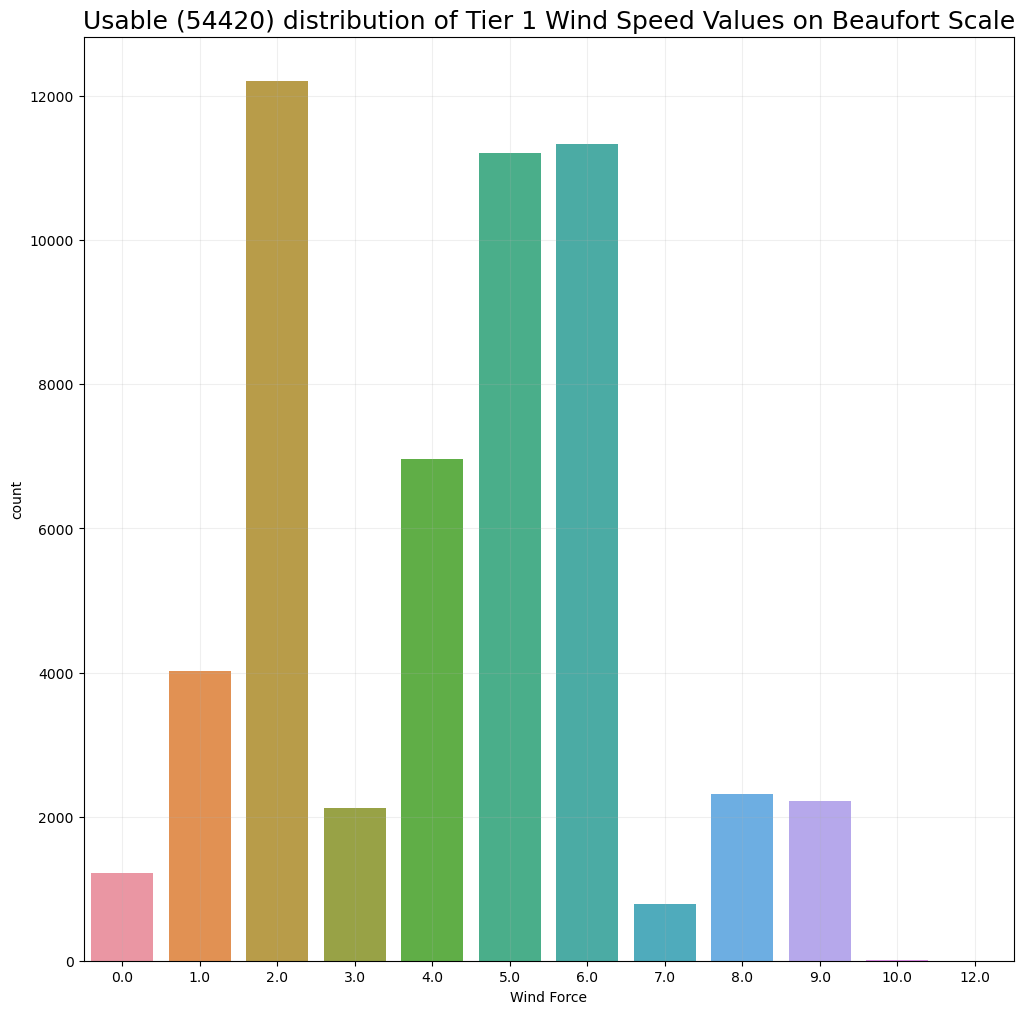

In [17]:
# Beaufort wind scale for Tier 1 usable data
print("Number of entries covered by the mapping so far: ", np.size(df_u["Wind Force"]))

f, ax = plt.subplots(figsize=(12, 12))
sns.countplot(x=df_u["Wind Force"])
ax.grid(alpha=0.2)
plt.title(
    "Usable (54420) distribution of Tier 1 Wind Speed Values on Beaufort Scale",
    fontsize=18,
)
plt.savefig(
    os.path.join(Figures, "Tier1_Distribution_Beaufort Scale_May13.png"),
    dpi=300,
    bbox_inches="tight",
)

Number of entries covered by the mapping so far:  57485


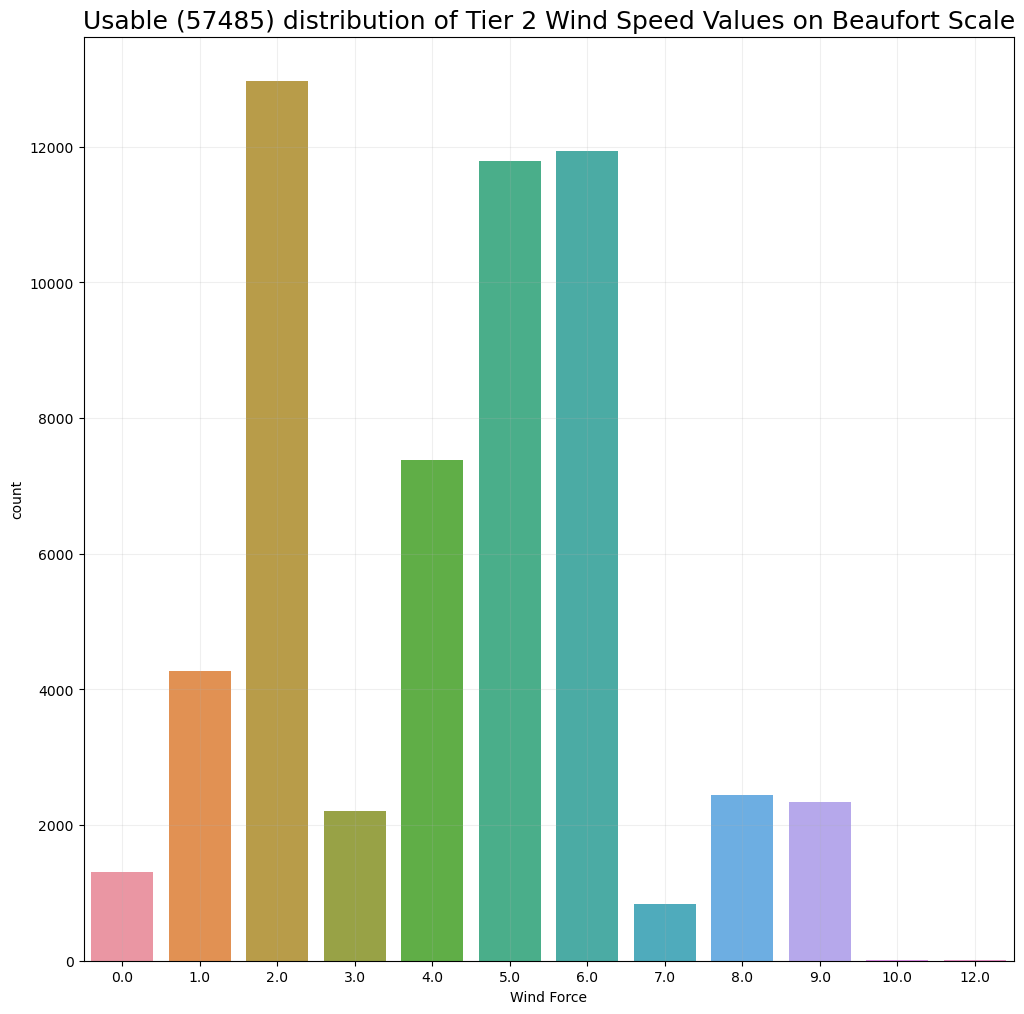

In [18]:
# Beaufort wind scale for Tier 2 usable data
print("Number of entries covered by the mapping so far: ", np.size(df_u2["Wind Force"]))

f, ax = plt.subplots(figsize=(12, 12))
sns.countplot(x=df_u2["Wind Force"])
ax.grid(alpha=0.2)
plt.title(
    "Usable (57485) distribution of Tier 2 Wind Speed Values on Beaufort Scale",
    fontsize=18,
)
plt.savefig(
    os.path.join(Figures, "Tier2_Distribution_Beaufort Scale_May13.png"),
    dpi=300,
    bbox_inches="tight",
)

In [19]:
# Testing the statistical significance of this wind distribution compared to the overall

# Mann Whitney U Test
# Non-parametric test - test that distribution x is the same as y, test of difference in location btwn dist

# Set parameters
x = df_u["Wind Force"]  # overall usable wind distribution
y = df_u2["Wind Force"]  # new wind distribution from infilling one day (lat&lon)

# Run Mann Whitney U Test
result_mannwhitneyu = stats.mannwhitneyu(x, y)

# Print results
print("Mann Whitney U Test:", result_mannwhitneyu)

# Kruskal_Wallis Test
# Non-parametric test - data is not assumed to be from a particular distribution

# Run Kruskal Wallis Test
result_kruskal = stats.kruskal(x, y)

# Print results
print("Kruskal-Wallis Test:", result_kruskal)

Mann Whitney U Test: MannwhitneyuResult(statistic=1567300332.5, pvalue=0.5554628397662154)
Kruskal-Wallis Test: KruskalResult(statistic=0.34762125805259986, pvalue=0.5554627767148783)


1826 :  (82, 33)
1827 :  (284, 33)
1828 :  (347, 33)
1829 :  (553, 33)
1830 :  (876, 33)
1831 :  (1014, 33)
1832 :  (942, 33)
1833 :  (857, 33)
1834 :  (863, 33)
1835 :  (1665, 33)
1836 :  (1996, 33)
1837 :  (2160, 33)
1838 :  (1749, 33)
1839 :  (1302, 33)
1840 :  (721, 33)
1841 :  (905, 33)
1842 :  (924, 33)
1843 :  (1375, 33)
1844 :  (1807, 33)
1845 :  (1912, 33)
1846 :  (3326, 33)
1847 :  (3974, 33)
1848 :  (2591, 33)
1849 :  (2077, 33)
1850 :  (2200, 33)
1851 :  (2573, 33)
1852 :  (2371, 33)
1853 :  (1269, 33)
1854 :  (729, 33)
1855 :  (376, 33)
1856 :  (171, 33)
1857 :  (340, 33)
1858 :  (287, 33)
1859 :  (237, 33)
1860 :  (135, 33)
1861 :  (172, 33)
1862 :  (176, 33)
1863 :  (165, 33)
1864 :  (457, 33)
1865 :  (853, 33)
1866 :  (929, 33)
1867 :  (380, 33)
1868 :  (415, 33)
1869 :  (229, 33)
1870 :  (28, 33)
1871 :  (213, 33)
1872 :  (126, 33)
1873 :  (121, 33)
1874 :  (247, 33)
1875 :  (150, 33)
1876 :  (102, 33)
1877 :  (418, 33)
1878 :  (1621, 33)
1879 :  (1889, 33)
1880 :  (11

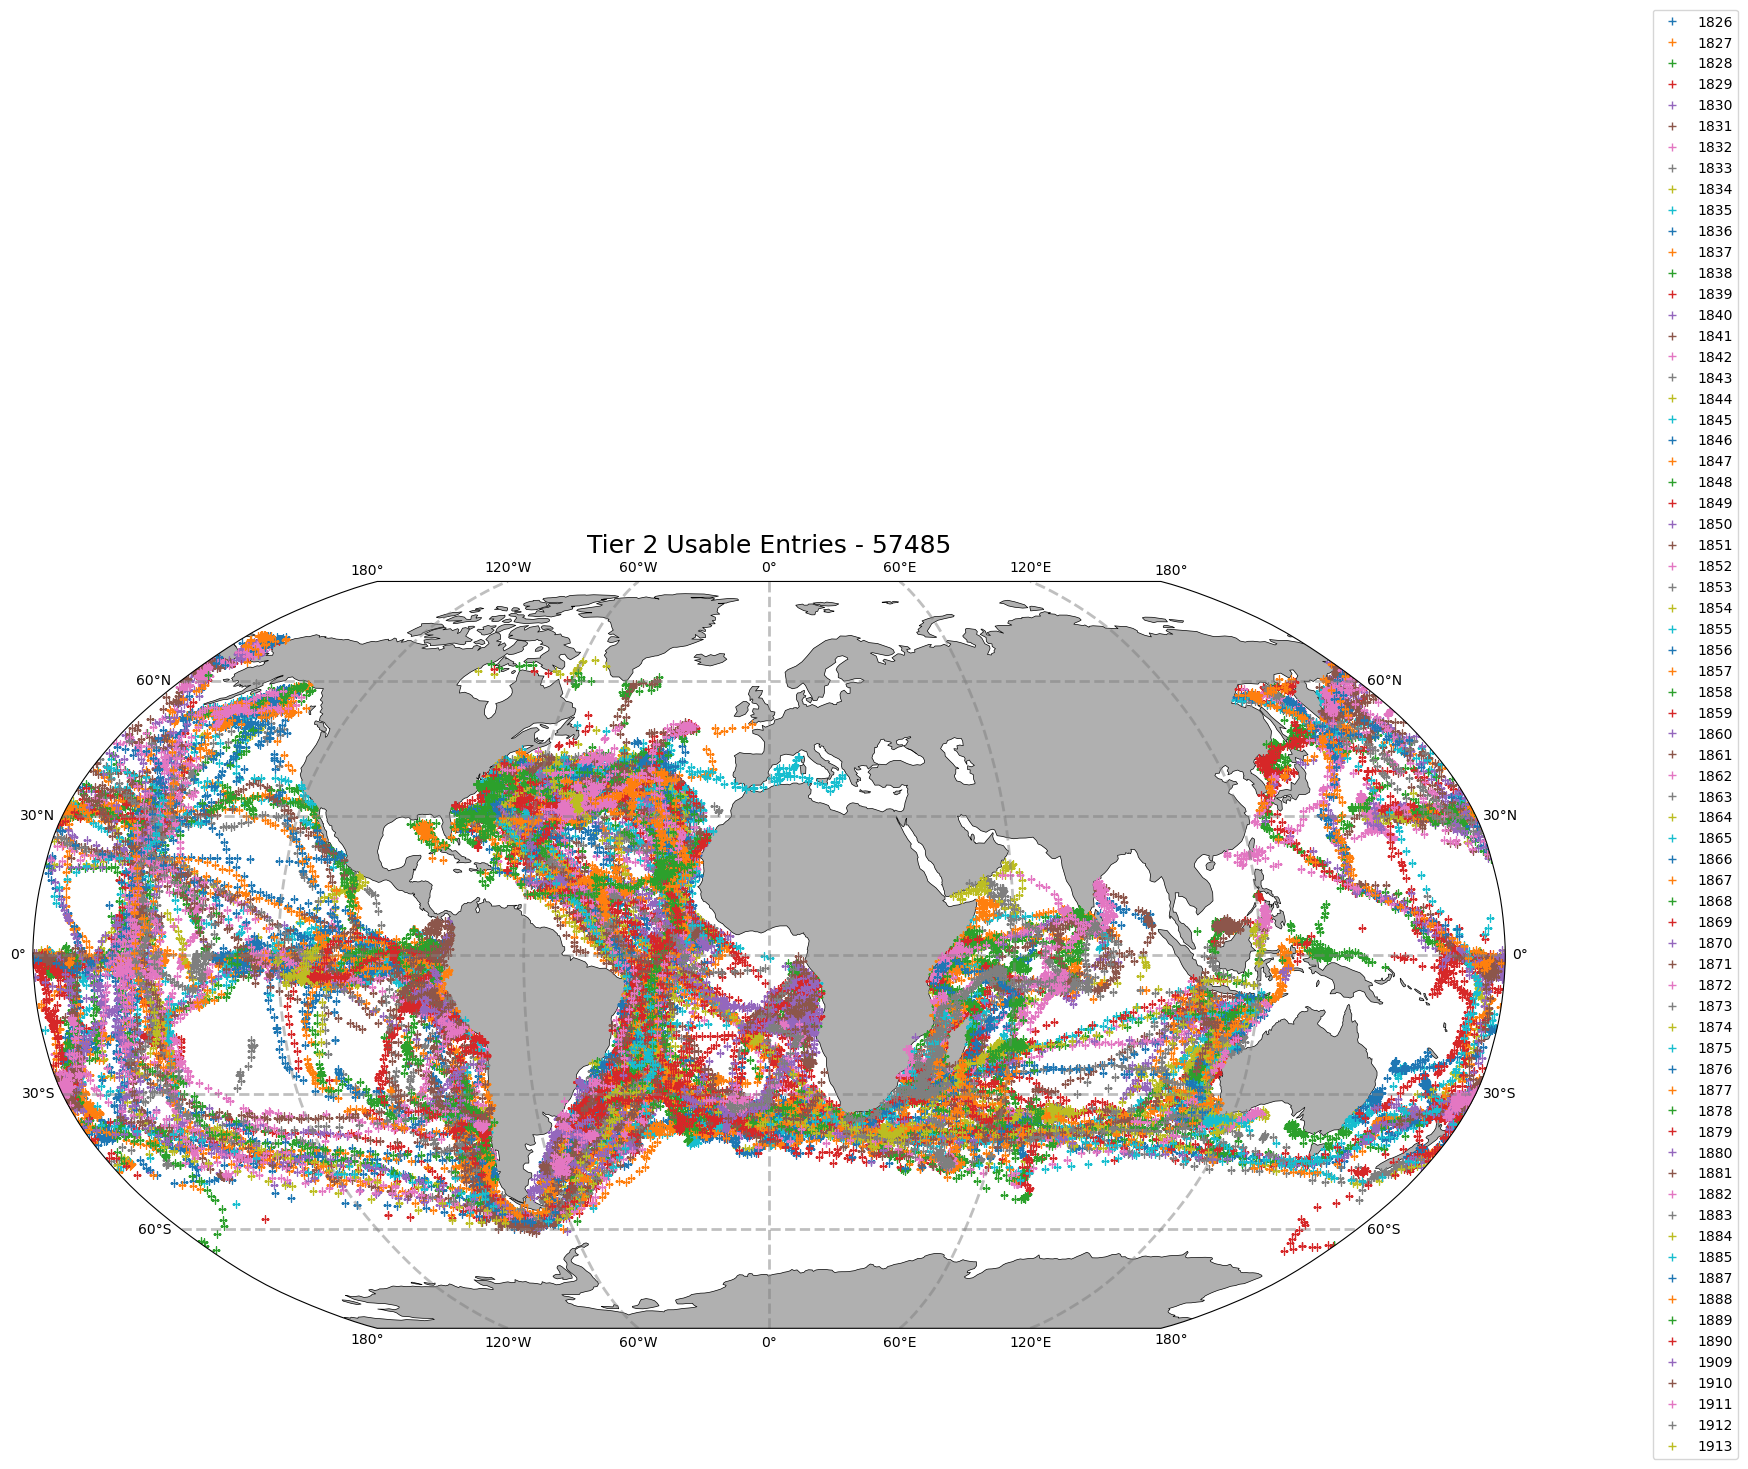

In [20]:
# Figure to plot new infilled coordinates with all data on a global map

# Setting up figure parameters
fig, ax = plt.subplots(figsize=(19, 20), subplot_kw={"projection": ccrs.Robinson()})
_ = ax.set_global()
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor="#b0b0b0")
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="gray",
    alpha=0.5,
    linestyle="--",
)

# Initialize counter for the number of plotted values
num_plotted_values = 0

# Plotting the data
for yr in sorted(
    df.loc[(df["Tier2_usable"] == True), "Entry Date Time"].dt.year.dropna().unique()
):
    work = df.loc[(df["Tier2_usable"] == True) & (df["Entry Date Time"].dt.year == yr),]
    ax.plot(
        work.Longitude,
        work.Latitude,
        "+",
        transform=ccrs.PlateCarree(),
        label="{:.0f}".format(yr),
    )
    num_plotted_values += len(
        work
    )  # Increment the counter by the number of points plotted
    print(yr, ": ", np.shape(work))

_ = ax.legend(loc=(1.1, -0.175))
plt.title("Tier 2 Usable Entries - 57485", fontsize=18)

# Print the total number of plotted values
print("Total number of plotted values:", num_plotted_values)

# Saving the figures
fig.savefig(
    os.path.join(Figures, "Tier2_Clean_up_plot_usable_May13.svg"),
    dpi=300,
    bbox_inches="tight",
)
fig.savefig(
    os.path.join(Figures, "Tier2_Clean_up_plot_usable_May13.jpg"),
    dpi=300,
    bbox_inches="tight",
)

Total number of plotted values: 57485


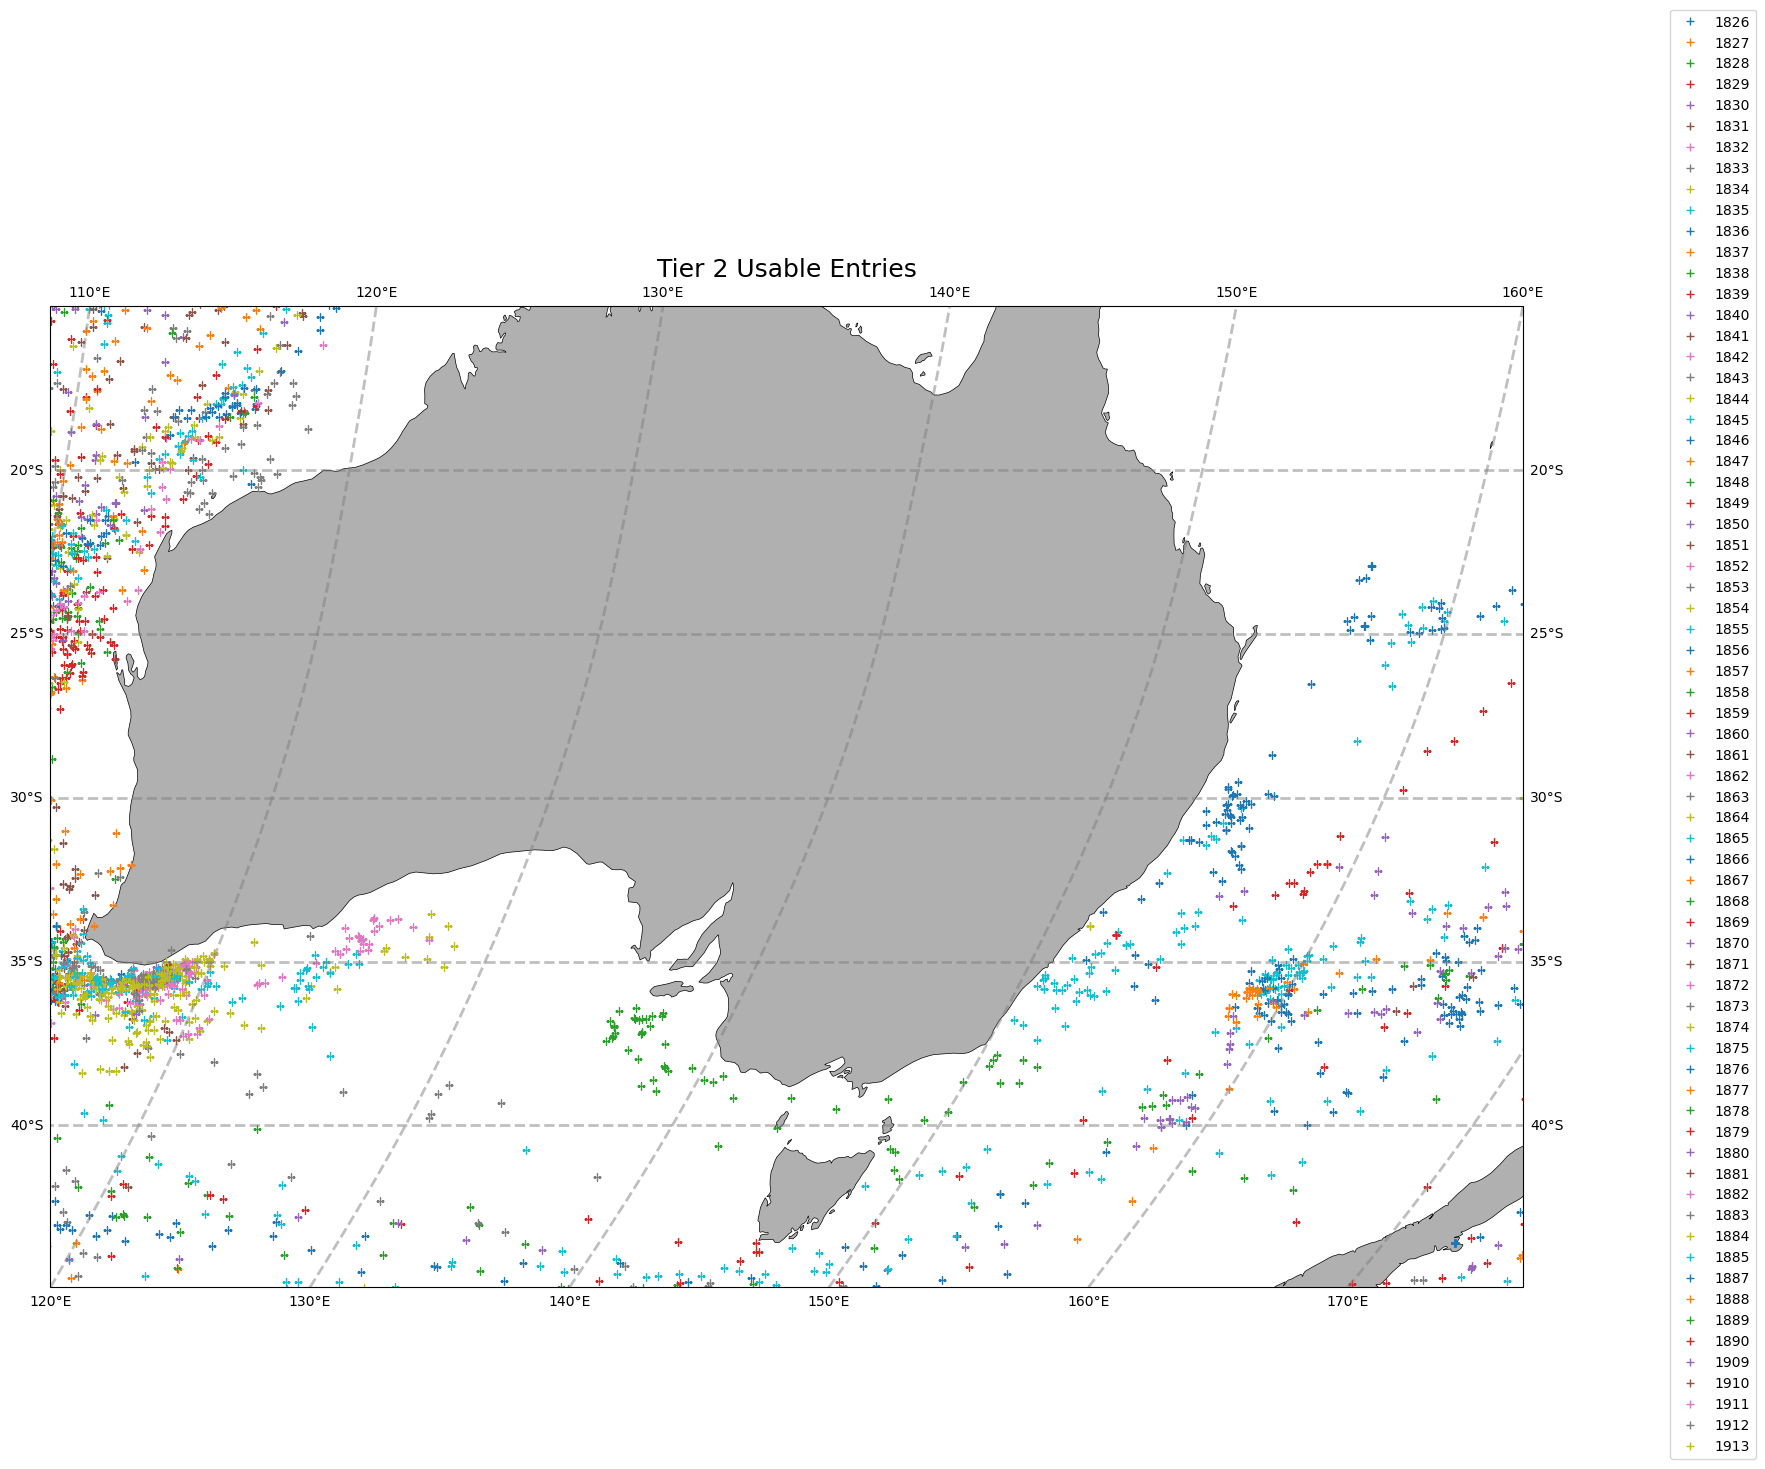

In [21]:
# Plotting all data with extents set to find points over land
# Or points that look wrong, stand by themself in the global ocean

# Set Extent
extent = [120, 160, -45, -15]
# extent = [minimum longitude, maximum longitude, minimum latitude, maximum latitude]

# Setting up figure parameters
fig, ax = plt.subplots(figsize=(19, 20), subplot_kw={"projection": ccrs.Robinson()})
# _ = ax.set_global()
_ = ax.set_extent(extent, crs=ccrs.PlateCarree())
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor="#b0b0b0")
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="gray",
    alpha=0.5,
    linestyle="--",
)

# Initialize counter for the number of plotted values
num_plotted_values = 0

# Plotting the data
for yr in sorted(
    df.loc[(df["Tier2_usable"] == True), "Entry Date Time"].dt.year.dropna().unique()
):
    work = df.loc[(df["Tier2_usable"] == True) & (df["Entry Date Time"].dt.year == yr),]
    ax.plot(
        work.Longitude,
        work.Latitude,
        "+",
        transform=ccrs.PlateCarree(),
        label="{:.0f}".format(yr),
    )
    num_plotted_values += len(
        work
    )  # Increment the counter by the number of points plotted
    # print(yr, ': ', np.shape(work))

_ = ax.legend(loc=(1.1, -0.175))
plt.title("Tier 2 Usable Entries", fontsize=18)

# Print the total number of plotted values
print("Total number of plotted values:", num_plotted_values)

In [22]:
# Finding the logbook ID, ID, and coordinates of flagged data

# Filter the DataFrame based on latitude and longitude ranges
filtered_df = df[
    (df["Latitude"] >= -30)
    & (df["Latitude"] <= -22)
    & (df["Longitude"] >= 130)
    & (df["Longitude"] <= 140)
]

# Display the filtered DataFrame
print(filtered_df[["LogBook ID", "ID", "Latitude", "Longitude"]])

Empty DataFrame
Columns: [LogBook ID, ID, Latitude, Longitude]
Index: []


In [23]:
# Creating a dataframe of the new infilled points for this tier
# df['Tier2_new'] = ((df["Latitude"].notna() & df["Longitude"].notna() & df["Wind Force"].notna()) &
# (df["One Day Dist"].notna() | df["One Day Lat"].notna() | df["One Day Lon"].notna()) &
# (df["Infilled"] == True))
df["Tier2_new"] = (
    df["Latitude"].notna() & df["Longitude"].notna() & df["Wind Force"].notna()
) & (df["Infilled"] == True)
df_new2 = df[df["Tier2_new"] == True]
df_new2

,DateTime,ID,LogBook ID,Page,Latitude,Longitude,Infilled,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Wind Force,Sea State,Cloud Cover,Weather,Ship Sightings,Miscellaneous Observations,wind force,Entry Date Time,Direction,Wind Direction Before,coord_diff,usable,usable_latlon,usable_lat,One Day Dist,Day 1 Infilled,One Day Lat,One Day Lon,Tier2_usable,Tier2_new
94865,1853-07-17 12:00:00,2455.0,A. Houghton (bark) 1853-1857,NaN,32.600000,-54.216667,True,NaN,NaN,NaN,NaN,NaN,135.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1853-07-17 12:00:00,nan,SSE,False,False,False,True,NaN,True,NaN,-0.133333,True,True
94822,1853-08-21 12:00:00,2498.0,A. Houghton (bark) 1853-1857,NaN,39.183333,-30.908333,True,NaN,NaN,NaN,Flores Island,NaN,326.25,moderate winds,4.0,NaN,NaN,NaN,NaN,Cruising off the coast of Flores Lat and long ...,False,1853-08-21 12:00:00,nan,N to WNW,False,False,False,False,63.212291,True,0.500000,-0.350000,True,True
94802,1853-09-05 12:00:00,2518.0,A. Houghton (bark) 1853-1857,NaN,38.816667,-28.450000,True,NaN,NaN,NaN,"""Working to the Eastward down through the pasa...",NaN,NaN,light winds,2.0,calms,NaN,NaN,NaN,NaN,False,1853-09-05 12:00:00,nan,NaN,False,False,False,False,4.698285,True,0.033333,0.033333,True,True
94799,1853-09-07 12:00:00,2521.0,A. Houghton (bark) 1853-1857,NaN,38.900000,-27.783333,True,NaN,NaN,NaN,NaN,E,202.5,moderate breezes,4.0,NaN,NaN,NaN,NaN,Under reef sails,False,1853-09-07 12:00:00,nan,S to SSW,False,False,False,True,NaN,True,NaN,-1.366667,True,True
94787,1853-09-19 12:00:00,2533.0,A. Houghton (bark) 1853-1857,NaN,34.566667,-30.458333,True,NaN,NaN,NaN,NaN,SW,157.5,fresh and light winds,2.0,NaN,NaN,NaN,NaN,NaN,False,1853-09-19 12:00:00,nan,S to SSE,False,False,False,True,NaN,True,NaN,0.316667,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34649,1846-06-20 12:00:00,64230.0,Yeoman (Bark) 1843-1848,NaN,5.700000,-30.083333,True,NaN,NaN,NaN,NaN,NNE,135.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1846-06-20 12:00:00,nan,SE,False,False,False,True,NaN,True,NaN,-0.166667,True,True
34644,1846-06-23 12:00:00,64235.0,Yeoman (Bark) 1843-1848,NaN,8.000000,-30.708333,True,NaN,NaN,NaN,NaN,N,90.0,moderate breezes,4.0,NaN,NaN,several rain showers,NaN,NaN,False,1846-06-23 12:00:00,nan,E,False,False,False,True,NaN,True,NaN,1.250000,True,True
34318,1846-07-17 12:00:00,64568.0,Yeoman (Bark) 1843-1848,NaN,33.750000,-48.041667,True,NaN,NaN,NaN,NaN,NNE,90.0,strong breezes,6.0,NaN,NaN,fine weather,NaN,NaN,False,1846-07-17 12:00:00,nan,E,False,False,False,True,NaN,True,NaN,-0.583333,True,True
33305,1846-08-06 12:00:00,65597.0,Yeoman (Bark) 1843-1848,NaN,37.866667,-39.058333,True,NaN,NaN,NaN,NaN,E by S,225.0,strong breezes,6.0,NaN,NaN,NaN,NaN,NaN,False,1846-08-06 12:00:00,nan,SW,False,False,False,True,NaN,True,NaN,-0.450000,True,True


1827 :  (15, 34)
1828 :  (22, 34)
1829 :  (4, 34)
1830 :  (23, 34)
1831 :  (11, 34)
1832 :  (13, 34)
1833 :  (32, 34)
1834 :  (59, 34)
1835 :  (126, 34)
1836 :  (105, 34)
1837 :  (124, 34)
1838 :  (115, 34)
1839 :  (48, 34)
1840 :  (10, 34)
1841 :  (19, 34)
1842 :  (46, 34)
1843 :  (124, 34)
1844 :  (155, 34)
1845 :  (134, 34)
1846 :  (192, 34)
1847 :  (158, 34)
1848 :  (112, 34)
1849 :  (75, 34)
1850 :  (85, 34)
1851 :  (115, 34)
1852 :  (106, 34)
1853 :  (46, 34)
1854 :  (50, 34)
1855 :  (31, 34)
1856 :  (5, 34)
1857 :  (38, 34)
1858 :  (16, 34)
1859 :  (17, 34)
1860 :  (3, 34)
1861 :  (15, 34)
1862 :  (7, 34)
1863 :  (7, 34)
1864 :  (31, 34)
1865 :  (51, 34)
1866 :  (53, 34)
1867 :  (18, 34)
1868 :  (25, 34)
1869 :  (14, 34)
1870 :  (2, 34)
1871 :  (7, 34)
1872 :  (4, 34)
1874 :  (10, 34)
1875 :  (15, 34)
1877 :  (30, 34)
1878 :  (99, 34)
1879 :  (150, 34)
1880 :  (84, 34)
1881 :  (52, 34)
1882 :  (53, 34)
1883 :  (14, 34)
1884 :  (14, 34)
1885 :  (7, 34)
1887 :  (3, 34)
1888 :  (8,

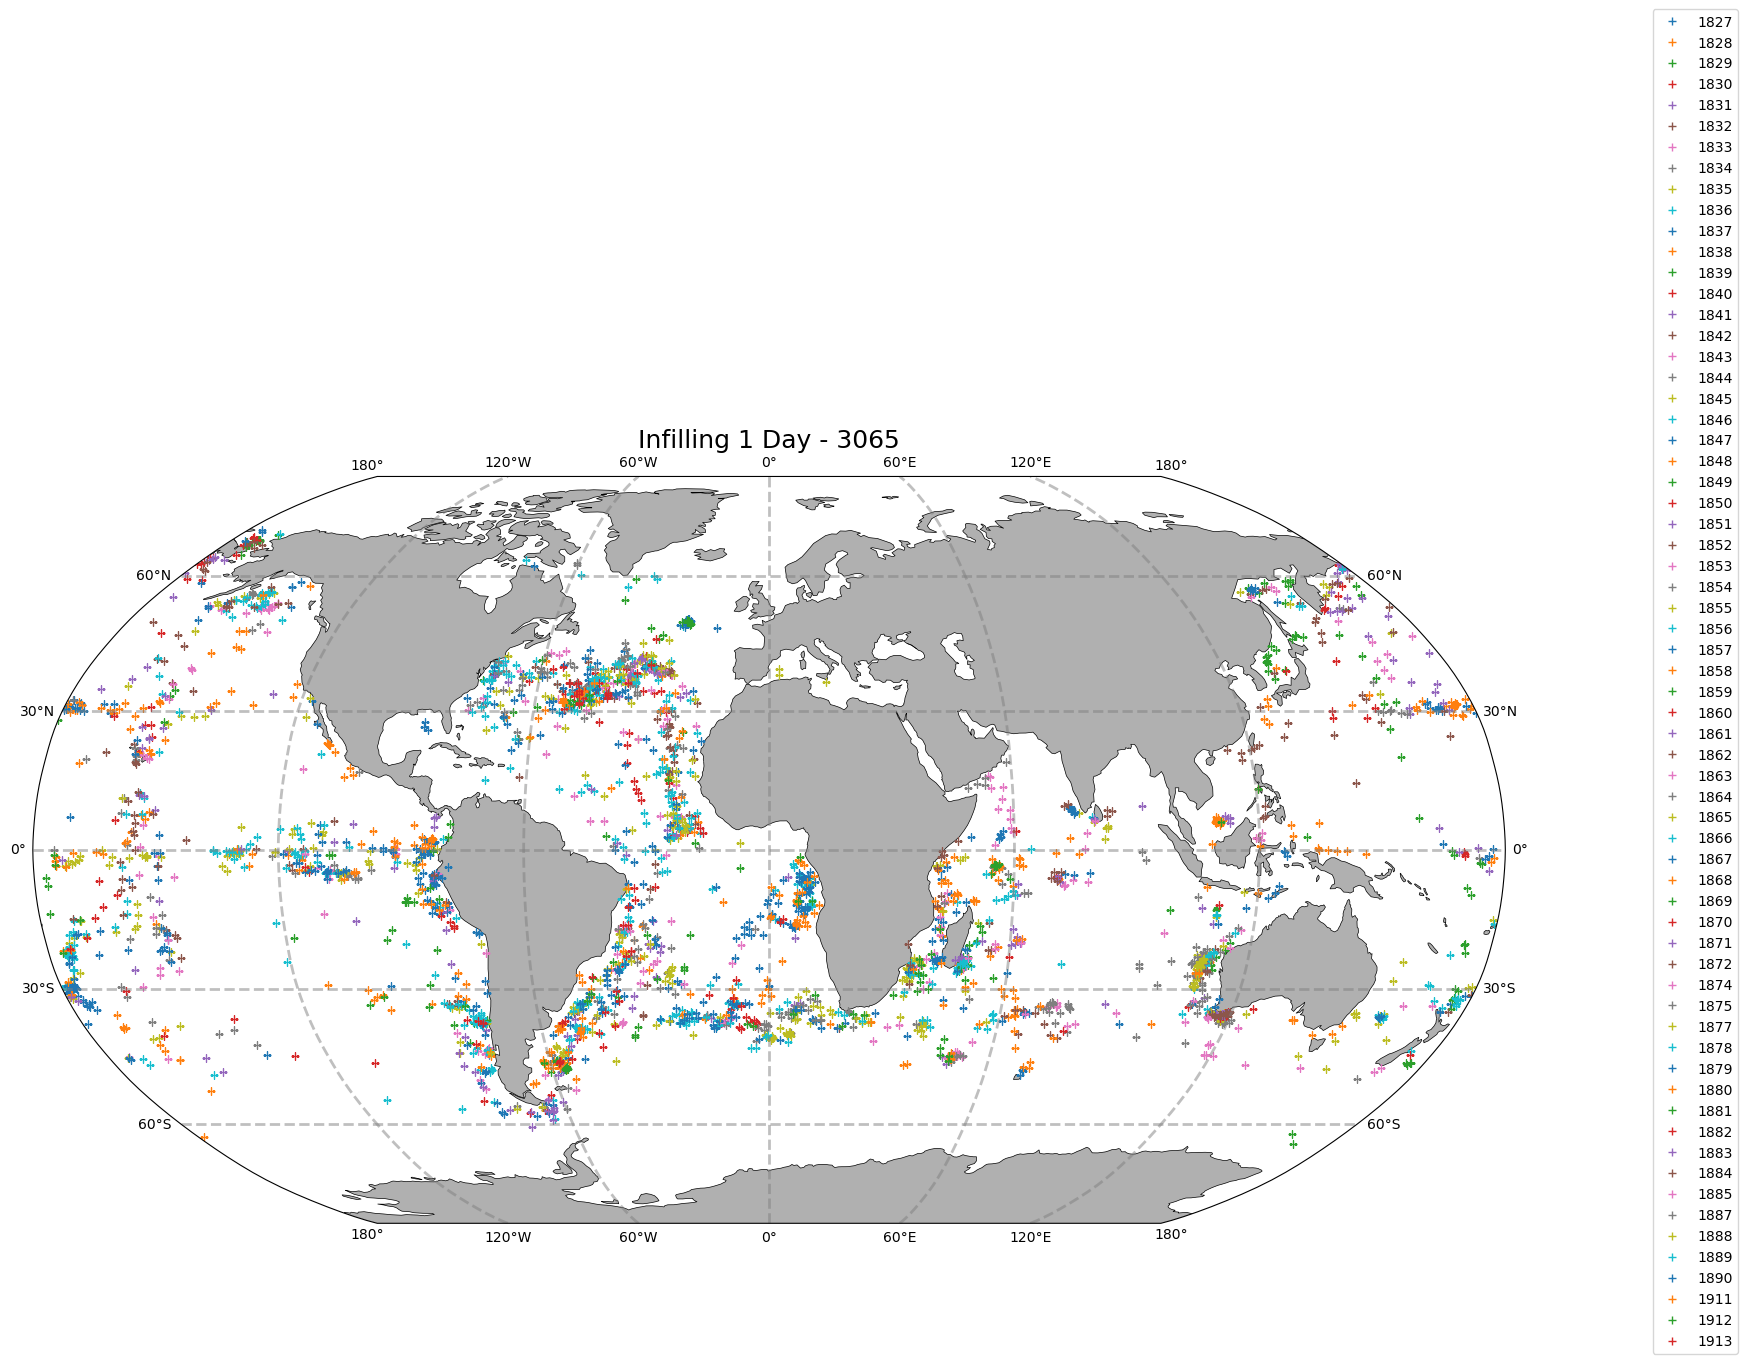

In [24]:
# Figure to plot new infilled coordinates with all data on a global map

# Setting up figure parameters
fig, ax = plt.subplots(figsize=(19, 20), subplot_kw={"projection": ccrs.Robinson()})
_ = ax.set_global()
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor="#b0b0b0")
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="gray",
    alpha=0.5,
    linestyle="--",
)

# Initialize counter for the number of plotted values
num_plotted_values = 0

# Plotting the data
for yr in sorted(
    df.loc[(df["Tier2_new"] == True), "Entry Date Time"].dt.year.dropna().unique()
):
    work = df.loc[(df["Tier2_new"] == True) & (df["Entry Date Time"].dt.year == yr),]
    ax.plot(
        work.Longitude,
        work.Latitude,
        "+",
        transform=ccrs.PlateCarree(),
        label="{:.0f}".format(yr),
    )
    num_plotted_values += len(
        work
    )  # Increment the counter by the number of points plotted
    print(yr, ": ", np.shape(work))

_ = ax.legend(loc=(1.1, -0.175))
plt.title("Infilling 1 Day - 3065", fontsize=18)

# Print the total number of plotted values
print("Total number of plotted values:", num_plotted_values)

# Saving the figures
fig.savefig(
    os.path.join(Figures, "Tier2_Infilled_May13.svg"), dpi=300, bbox_inches="tight"
)
fig.savefig(
    os.path.join(Figures, "Tier2_Infilled_May13.jpg"), dpi=300, bbox_inches="tight"
)

In [25]:
# Creating a dataframe of the new infilled points for this tier

# Infilling one day df
df["Day 1"] = (
    df["Latitude"].notna() & df["Longitude"].notna() & df["Wind Force"].notna()
) & (df["Day 1 Infilled"] == True)
df_day1 = df[df["Day 1"] == True]
print("1 Day:", len(df_day1))

1 Day: 3065


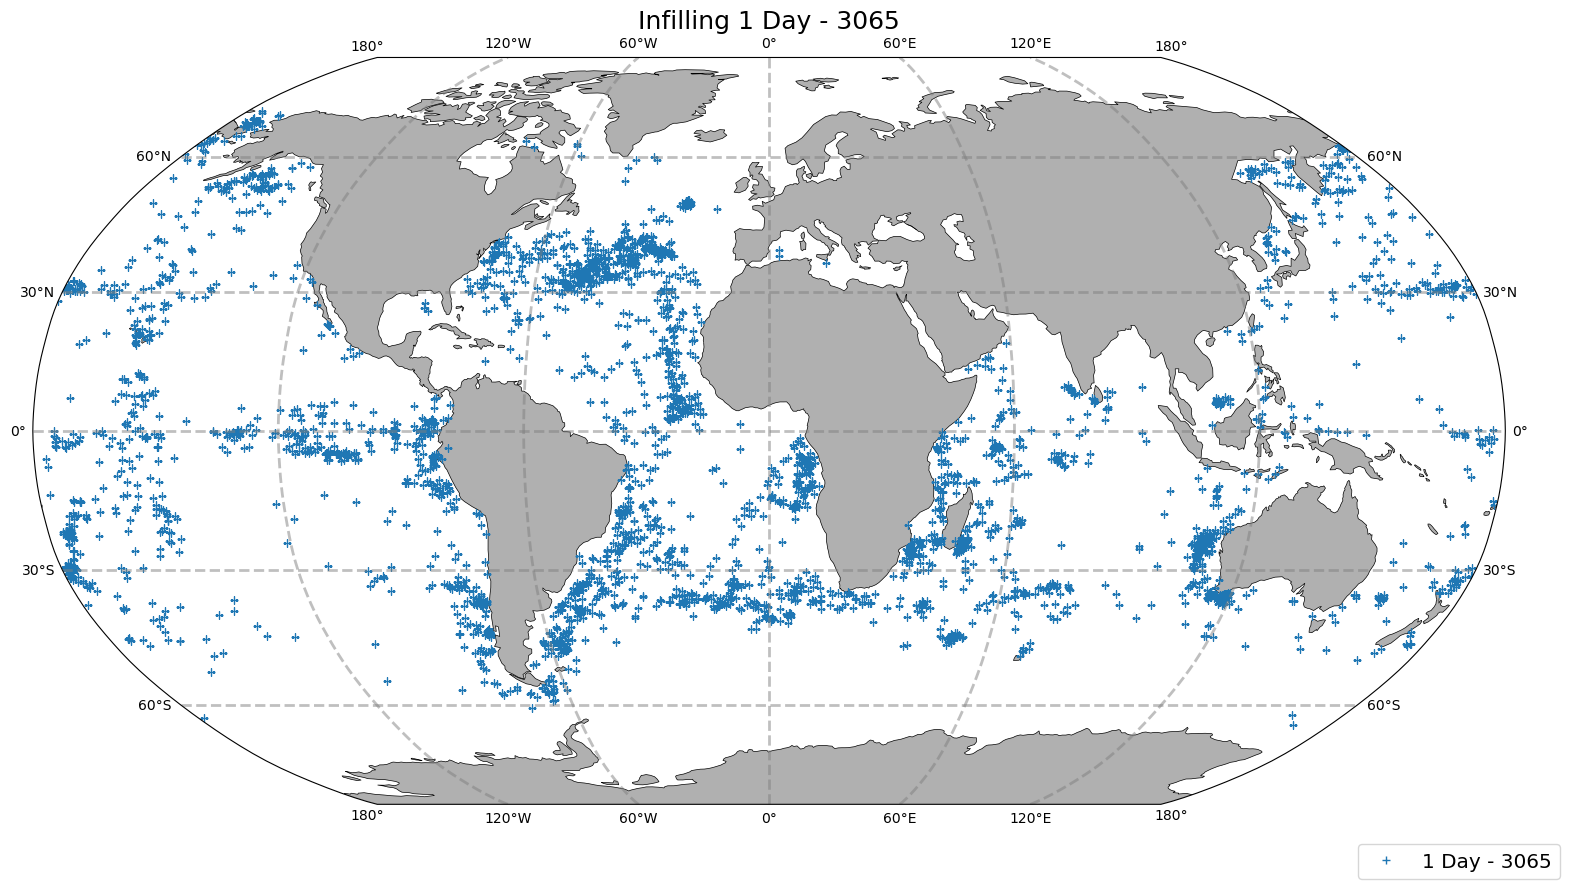

In [26]:
# Figure to plot new infilled coordinates with all data on a global map

# Setting up figure parameters
fig, ax = plt.subplots(figsize=(19, 20), subplot_kw={"projection": ccrs.Robinson()})
_ = ax.set_global()
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor="#b0b0b0")
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="gray",
    alpha=0.5,
    linestyle="--",
)

# Plotting the data
_ = ax.plot(
    df_day1["Longitude"],
    df_day1["Latitude"],
    "+",
    transform=ccrs.PlateCarree(),
    label=f"1 Day - {len(df_day1)}",
)

_ = ax.legend(loc=(0.90, -0.10), fontsize="x-large")
plt.title("Infilling 1 Day - 3065", fontsize=18)

# Saving the figures
fig.savefig(
    os.path.join(Figures, "Tier2_Infilled_by_day_May13.jpg"),
    dpi=300,
    bbox_inches="tight",
)

In [27]:
# Dropping the extra infilling columns
columns_to_drop = ["Day 1 Infilled", "Day 1"]
df.drop(columns=columns_to_drop, inplace=True)

### Save data to CSV

In [28]:
df.to_csv(
    os.path.join(CSV, "Tier2_logentries-export-2024-05-13.csv"), index=False
)  # .csv file seems unreadable, don't know what the issue is: using pickle instead
df.to_pickle("Tier2_logentries-export-2024-05-13.pkl")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 94864 entries, 10762 to 20332
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DateTime                    94860 non-null  object        
 1   ID                          94861 non-null  float64       
 2   LogBook ID                  94861 non-null  object        
 3   Page                        58562 non-null  float64       
 4   Latitude                    74634 non-null  float64       
 5   Longitude                   64913 non-null  float64       
 6   Infilled                    94864 non-null  bool          
 7   Depth                       2075 non-null   float64       
 8   Depth Unit                  22455 non-null  object        
 9   Bottom                      63 non-null     object        
 10  Landmark                    14900 non-null  object        
 11  Ship Heading/Course         52176 non-null  object     

,DateTime,ID,LogBook ID,Page,Latitude,Longitude,Infilled,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Wind Force,Sea State,Cloud Cover,Weather,Ship Sightings,Miscellaneous Observations,wind force,Entry Date Time,Direction,Wind Direction Before,coord_diff,usable,usable_latlon,usable_lat,One Day Dist,One Day Lat,One Day Lon,Tier2_usable,Tier2_new
10762,4.5,4.5,4.5,4.5,NaN,NaN,False,4.5,4.5,4.5,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaT,nan,NaN,False,False,False,False,NaN,NaN,NaN,False,False
10764,10,10.0,10,10.0,NaN,NaN,False,10.0,10,10,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaT,nan,NaN,False,False,False,False,NaN,NaN,NaN,False,False
94878,1853-07-06 12:00:00,2442.0,A. Houghton (bark) 1853-1857,NaN,37.85,-58.466667,False,NaN,NaN,NaN,NaN,SE,225.0,moderate gales,7.0,NaN,NaN,NaN,NaN,NaN,False,1853-07-06 12:00:00,nan,SW,False,True,True,True,NaN,NaN,NaN,True,False
94876,1853-07-07 12:00:00,2443.0,A. Houghton (bark) 1853-1857,NaN,37.25,-55.066667,False,NaN,NaN,NaN,NaN,NaN,225.0,fresh breezes,5.0,NaN,NaN,NaN,NaN,NaN,False,1853-07-07 12:00:00,nan,SW,False,True,True,True,NaN,NaN,NaN,True,False
94875,1853-07-08 12:00:00,2445.0,A. Houghton (bark) 1853-1857,NaN,35.00,-53.400000,False,NaN,NaN,NaN,NaN,SE,NaN,NaN,NaN,NaN,NaN,fine,NaN,NaN,False,1853-07-08 12:00:00,nan,NaN,False,False,True,True,NaN,NaN,NaN,False,False
